In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import csv

In [65]:
yrst = 1991
yrend = 2021
modlist = ['TOM12_TJ_GEA0', 'TOM12_TJ_GEA1', 'TOM12_TJ_CNA1','RIV12_PT_NC01', 'RIV12_PT_NC02', 'RIV12_PT_ER23','RIV12_PT_ER24']

modlist1 = ['TOM12_TJ_GEA0', 'TOM12_TJ_GEA1', 'TOM12_TJ_CNA1']
modlist2 = ['RIV12_PT_NC01', 'RIV12_PT_NC02', 'RIV12_PT_ER23','RIV12_PT_ER24']

In [66]:
# Creating a list with assessment indicators
metrics_list = ['bias', 'RMSE_DIC', 'WSS']

# Create dictionaries containing data for each model
model_data = {}

for model in modlist1:
     # Build CSV file name and path
    csv_file_name = f'{yrst}-{yrend}_{model}_bias_RMSE_WSS_mean_umolL_global.csv'
    directory_path = os.path.join("/gpfs/home/gdg21vsa/ModelEvaluation/", model)
    csv_file_path = os.path.join(directory_path, csv_file_name)

    with open(csv_file_path, 'r') as file:
        csv_reader = pd.read_csv(file, header=None,skiprows=1, nrows=3)
        csv_reader = csv_reader.iloc[:, -4:] 

        # print(csv_reader)

        # Create an empty dictionary to store the current model's assessment metrics data
        model_metrics_data = {}

        column = 0

        for row in range(0,3):
            metric_name = csv_reader.iloc[row,column]

            DIC_value = csv_reader.iloc[row,column+1]
            TA_value = csv_reader.iloc[row,column+2]
            TADIC_value = csv_reader.iloc[row,column+3]
            
            model_metrics_data[metric_name] = {
                'DIC': DIC_value,
                'TA': TA_value,
                'TA-DIC': TADIC_value
            }

            model_data[model] = model_metrics_data


In [67]:
model_data

{'TOM12_TJ_GEA0': {'bias': {'DIC': 23.462659956729567,
   'TA': 48.3163540212704,
   'TA-DIC': 24.85406027547833},
  'RMSE': {'DIC': 69.12655138821974,
   'TA': 90.33100543919151,
   'TA-DIC': 43.94421369838268},
  'WSS': {'DIC': 0.8124679253661187,
   'TA': 0.7826315683098427,
   'TA-DIC': 0.9418174739122528}},
 'TOM12_TJ_GEA1': {'bias': {'DIC': 31.628919722354567,
   'TA': 57.1122524587704,
   'TA-DIC': 25.48290549032208},
  'RMSE': {'DIC': 75.07709308229637,
   'TA': 99.34571217571336,
   'TA-DIC': 45.43290624401988},
  'WSS': {'DIC': 0.7973199840278179,
   'TA': 0.77296648084365,
   'TA-DIC': 0.9391497215992948}},
 'TOM12_TJ_CNA1': {'bias': {'DIC': 56.10328495672957,
   'TA': 92.9379360525204,
   'TA-DIC': 36.83455954305646},
  'RMSE': {'DIC': 122.77359182000224,
   'TA': 173.09738668832776,
   'TA-DIC': 60.96000993790746},
  'WSS': {'DIC': 0.5266633196377746,
   'TA': 0.5554599627994333,
   'TA-DIC': 0.9004308357207058}}}

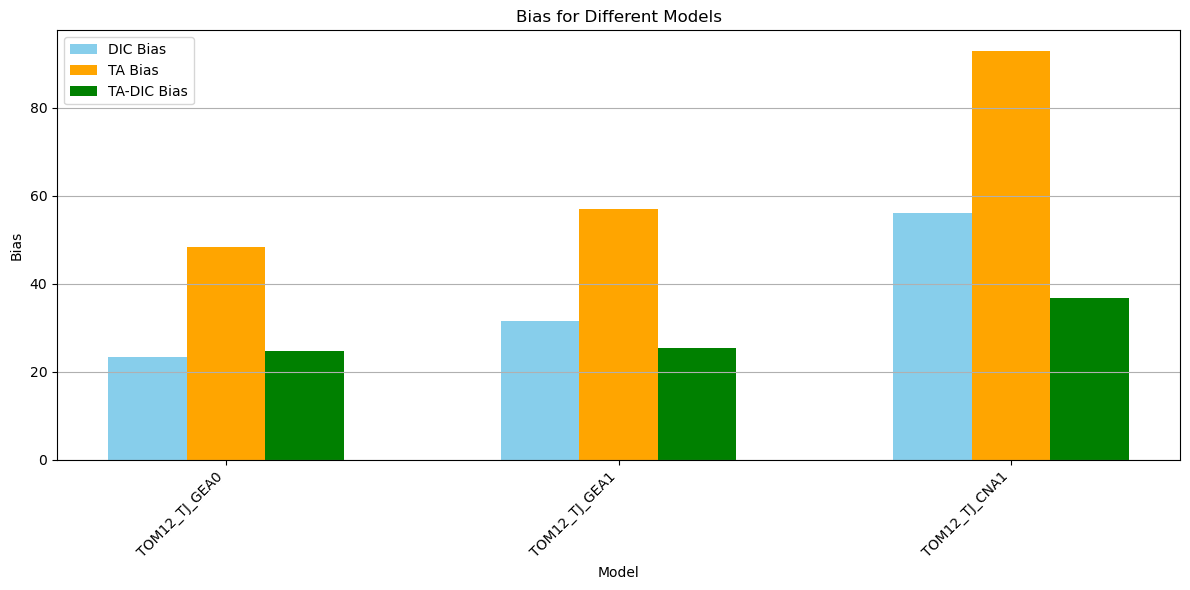

In [69]:
def plot_bias(data):
    model_names = list(data.keys())
    dic_bias_values = [data[model]['bias']['DIC'] for model in model_names]
    ta_bias_values = [data[model]['bias']['TA'] for model in model_names]
    ta_dic_bias_values = [data[model]['bias']['TA-DIC'] for model in model_names]

    width = 0.2
    x = range(len(model_names))

    plt.figure(figsize=(12, 6))
    plt.bar(x, dic_bias_values, width=width, label='DIC Bias', color='skyblue')
    plt.bar([i + width for i in x], ta_bias_values, width=width, label='TA Bias', color='orange')
    plt.bar([i + 2 * width for i in x], ta_dic_bias_values, width=width, label='TA-DIC Bias', color='green')

    plt.xlabel('Model')
    plt.ylabel('Bias')
    plt.title('Global Bias for Different Models')
    plt.xticks([i + width for i in x], model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



plot_bias(model_data)


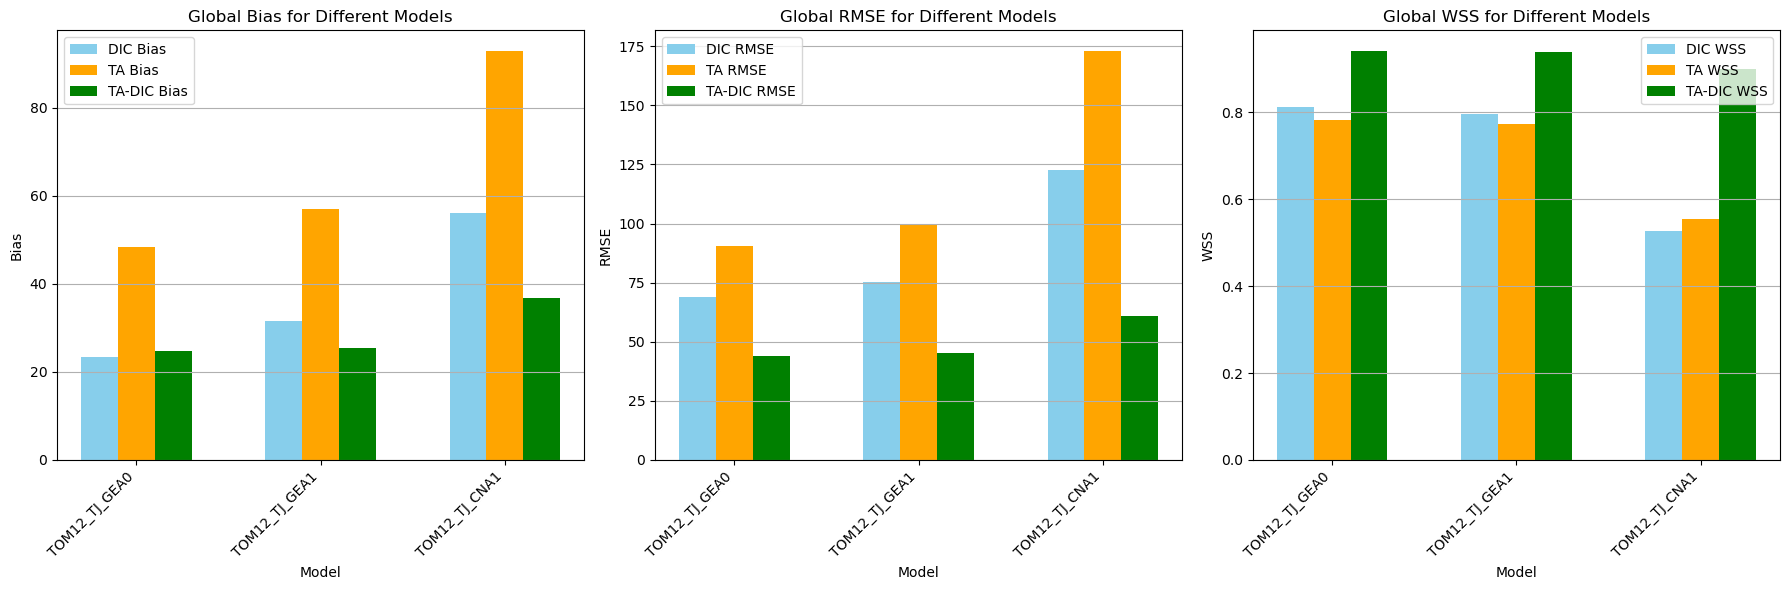

In [74]:
def plot_metrics(data):
    model_names = list(data.keys())
    dic_bias_values = [data[model]['bias']['DIC'] for model in model_names]
    ta_bias_values = [data[model]['bias']['TA'] for model in model_names]
    ta_dic_bias_values = [data[model]['bias']['TA-DIC'] for model in model_names]

    dic_rmse_values = [data[model]['RMSE']['DIC'] for model in model_names]
    ta_rmse_values = [data[model]['RMSE']['TA'] for model in model_names]
    ta_dic_rmse_values = [data[model]['RMSE']['TA-DIC'] for model in model_names]

    dic_wss_values = [data[model]['WSS']['DIC'] for model in model_names]
    ta_wss_values = [data[model]['WSS']['TA'] for model in model_names]
    ta_dic_wss_values = [data[model]['WSS']['TA-DIC'] for model in model_names]

    width = 0.2
    x = range(len(model_names))

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plotting DIC Bias, TA Bias, and TA-DIC Bias
    axs[0].bar(x, dic_bias_values, width=width, label='DIC Bias', color='skyblue')
    axs[0].bar([i + width for i in x], ta_bias_values, width=width, label='TA Bias', color='orange')
    axs[0].bar([i + 2 * width for i in x], ta_dic_bias_values, width=width, label='TA-DIC Bias', color='green')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Bias')
    axs[0].set_title('Global Bias for Different Models')
    axs[0].set_xticks([i + width for i in x])
    axs[0].set_xticklabels(model_names, rotation=45, ha='right')
    axs[0].legend()
    axs[0].grid(axis='y')

    # Plotting DIC RMSE, TA RMSE, and TA-DIC RMSE
    axs[1].bar(x, dic_rmse_values, width=width, label='DIC RMSE', color='skyblue')
    axs[1].bar([i + width for i in x], ta_rmse_values, width=width, label='TA RMSE', color='orange')
    axs[1].bar([i + 2 * width for i in x], ta_dic_rmse_values, width=width, label='TA-DIC RMSE', color='green')
    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('RMSE')
    axs[1].set_title('Global RMSE for Different Models')
    axs[1].set_xticks([i + width for i in x])
    axs[1].set_xticklabels(model_names, rotation=45, ha='right')
    axs[1].legend()
    axs[1].grid(axis='y')

    # Plotting DIC WSS, TA WSS, and TA-DIC WSS
    axs[2].bar(x, dic_wss_values, width=width, label='DIC WSS', color='skyblue')
    axs[2].bar([i + width for i in x], ta_wss_values, width=width, label='TA WSS', color='orange')
    axs[2].bar([i + 2 * width for i in x], ta_dic_wss_values, width=width, label='TA-DIC WSS', color='green')
    axs[2].set_xlabel('Model')
    axs[2].set_ylabel('WSS')
    axs[2].set_title('Global WSS for Different Models')
    axs[2].set_xticks([i + width for i in x])
    axs[2].set_xticklabels(model_names, rotation=45, ha='right')
    axs[2].legend()
    axs[2].grid(axis='y')

    plt.tight_layout()
    plt.show()

plot_metrics(model_data)